<a href="https://colab.research.google.com/github/diegoarz02/AED-MUESTREO-UNMSM/blob/main/AED_Muestreo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Librerias
!pip install statsmodels
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
import os
import pandas as pd
import gspread
from google.colab import auth
from google.auth import default
from gspread_dataframe import set_with_dataframe
from googleapiclient.discovery import build
from datetime import datetime
from wordcloud import WordCloud
import matplotlib as mpl
from scipy.stats import ttest_ind
from scipy.stats import f_oneway
from scipy.stats import chi2_contingency
from scipy.stats import spearmanr
import matplotlib.pyplot as plt
import re
from matplotlib.colors import LinearSegmentedColormap, TwoSlopeNorm

#Autenticación con Google
auth.authenticate_user()
creds, _ = default()
gc = gspread.authorize(creds)
drive_service = build('drive', 'v3', credentials=creds)

In [3]:
#Cargamos el form
# Abre el documento por su URL
sheet_url = "https://docs.google.com/spreadsheets/d/17STJObUAMMI1e0guMN1bMuJzuuxxkRmTUb1VYu6_QiM/edit?usp=sharing"
spreadsheet = gc.open_by_url(sheet_url)
#Verificamos nombre de las hojas
worksheet_list = spreadsheet.worksheets()
for i, ws in enumerate(worksheet_list):
    print(f"Hoja {i+1}: {ws.title}")

# Seleccionamos la hoja 1
worksheet = worksheet_list[0]

# Convertimos a df
from gspread_dataframe import get_as_dataframe
df = get_as_dataframe(worksheet, evaluate_formulas=True)
df = df.dropna(how='all')
df.head()

Hoja 1: Respuestas


,Marca temporal,Dirección de correo electrónico,1. Facultad a la que perteneces:,2. Ciclo que estás cursando actualmente:,3. Sexo,4. Edad,5. ¿Cómo te visualizas profesionalmente al egresar de la universidad?,6. ¿Planeas estudiar una maestría luego de egresar?,7. Matriz [Me siento preparado(a) para enfrentar entrevistas laborales.],7. Matriz [Confío en mis habilidades técnicas para desempeñarme en un trabajo.],...,8. ¿Qué área consideras que necesita mayor reforzamiento?,9. ¿Cuál de los siguientes factores influye más en tu visión profesional?,10. ¿Participas actualmente en actividades extracurriculares?,"11. En el caso de sí, ¿Qué actividades extracurriculares desempeñas?",12. ¿Cuál es la principal preocupación sobre tu futuro laboral?,13. ¿Qué te motiva a seguir tu carrera?,14. Matriz [Mi familia influye significativamente en mis decisiones profesionales.],14. Matriz [Estoy motivado/a por emprender mi propio negocio en lugar de buscar empleo.],14. Matriz [Creo que mi carrera tendrá alta demanda laboral en los próximos años.],15. ¿Qué acción concreta crees que la UNMSM debería tomar para mejorar tu preparación profesional?
0,17/06/2025 9:40:17,NaN,Facultad de Ciencias Matemáticas,1.º–2.º,Mujer,17,Trabajando en el sector público,SI,Totalmente en desacuerdo,Totalmente en desacuerdo,...,Gestión de proyectos,Situación económica,NO,NaN,Falta de oportunidades,Estabilidad económica,En desacuerdo,Totalmente en desacuerdo,Totalmente en desacuerdo,Mejores profesores
1,17/06/2025 11:08:50,NaN,Facultad de Educación,7.º–8.°,Mujer,22,Trabajando en el sector público,SI,De acuerdo,De acuerdo,...,Gestión de proyectos,Expectativas familiares,NO,NaN,Baja remuneración,Impacto social,De acuerdo,Ni de acuerdo ni en desacuerdo,De acuerdo,Tomar en consideración las demandas actuales q...
2,17/06/2025 11:18:24,NaN,Facultad de Educación,5.º–6.º,Mujer,23,Trabajando en una empresa privada,SI,De acuerdo,De acuerdo,...,Habilidades técnicas,Interés personal,NO,NaN,Competencia en el mercado,Realización personal,Ni de acuerdo ni en desacuerdo,Ni de acuerdo ni en desacuerdo,Totalmente de acuerdo,Prácticas no solo en colegios sino en ellos se...
3,17/06/2025 11:20:39,NaN,Facultad de Ingeniería Industrial,5.º–6.º,Hombre,19,Trabajando en una empresa privada,TAL VEZ,Ni de acuerdo ni en desacuerdo,Ni de acuerdo ni en desacuerdo,...,Habilidades técnicas,Interés personal,SI,Voluntariado,Inestabilidad laboral,Estabilidad económica,De acuerdo,De acuerdo,De acuerdo,Brindar mayor cantidad de cursos gratuitos que...
4,17/06/2025 11:23:52,NaN,Facultad de Educación,5.º–6.º,Mujer,21,Trabajando en el sector público,SI,Totalmente de acuerdo,De acuerdo,...,Inglés/otros idiomas,Interés personal,NO,NaN,Competencia en el mercado,Impacto social,En desacuerdo,Totalmente de acuerdo,De acuerdo,Mejorar las herramientas pedagógicas en clases...


In [4]:
# Consultamos nuestra data para la hoja 1
worksheet = gc.open_by_url("https://docs.google.com/spreadsheets/d/17STJObUAMMI1e0guMN1bMuJzuuxxkRmTUb1VYu6_QiM/edit").get_worksheet(0)

# Convertimos en DataFrame y limpiamos
df1 = get_as_dataframe(worksheet, evaluate_formulas=True).dropna(how='all')

# Eliminamos las 2 primeras columnas
df1 = df1.iloc[:, 2:]

# Mostramos primeras filas
df1.head()

,1. Facultad a la que perteneces:,2. Ciclo que estás cursando actualmente:,3. Sexo,4. Edad,5. ¿Cómo te visualizas profesionalmente al egresar de la universidad?,6. ¿Planeas estudiar una maestría luego de egresar?,7. Matriz [Me siento preparado(a) para enfrentar entrevistas laborales.],7. Matriz [Confío en mis habilidades técnicas para desempeñarme en un trabajo.],"7. Matriz [Cuento con habilidades blandas necesarias para el mundo laboral (comunicación, liderazgo, trabajo en equipo).]",7. Matriz [Me estoy preparando adecuadamente para encontrar oportunidades laborales.],...,8. ¿Qué área consideras que necesita mayor reforzamiento?,9. ¿Cuál de los siguientes factores influye más en tu visión profesional?,10. ¿Participas actualmente en actividades extracurriculares?,"11. En el caso de sí, ¿Qué actividades extracurriculares desempeñas?",12. ¿Cuál es la principal preocupación sobre tu futuro laboral?,13. ¿Qué te motiva a seguir tu carrera?,14. Matriz [Mi familia influye significativamente en mis decisiones profesionales.],14. Matriz [Estoy motivado/a por emprender mi propio negocio en lugar de buscar empleo.],14. Matriz [Creo que mi carrera tendrá alta demanda laboral en los próximos años.],15. ¿Qué acción concreta crees que la UNMSM debería tomar para mejorar tu preparación profesional?
0,Facultad de Ciencias Matemáticas,1.º–2.º,Mujer,17,Trabajando en el sector público,SI,Totalmente en desacuerdo,Totalmente en desacuerdo,Totalmente en desacuerdo,Totalmente en desacuerdo,...,Gestión de proyectos,Situación económica,NO,NaN,Falta de oportunidades,Estabilidad económica,En desacuerdo,Totalmente en desacuerdo,Totalmente en desacuerdo,Mejores profesores
1,Facultad de Educación,7.º–8.°,Mujer,22,Trabajando en el sector público,SI,De acuerdo,De acuerdo,De acuerdo,Ni de acuerdo ni en desacuerdo,...,Gestión de proyectos,Expectativas familiares,NO,NaN,Baja remuneración,Impacto social,De acuerdo,Ni de acuerdo ni en desacuerdo,De acuerdo,Tomar en consideración las demandas actuales q...
2,Facultad de Educación,5.º–6.º,Mujer,23,Trabajando en una empresa privada,SI,De acuerdo,De acuerdo,De acuerdo,De acuerdo,...,Habilidades técnicas,Interés personal,NO,NaN,Competencia en el mercado,Realización personal,Ni de acuerdo ni en desacuerdo,Ni de acuerdo ni en desacuerdo,Totalmente de acuerdo,Prácticas no solo en colegios sino en ellos se...
3,Facultad de Ingeniería Industrial,5.º–6.º,Hombre,19,Trabajando en una empresa privada,TAL VEZ,Ni de acuerdo ni en desacuerdo,Ni de acuerdo ni en desacuerdo,De acuerdo,De acuerdo,...,Habilidades técnicas,Interés personal,SI,Voluntariado,Inestabilidad laboral,Estabilidad económica,De acuerdo,De acuerdo,De acuerdo,Brindar mayor cantidad de cursos gratuitos que...
4,Facultad de Educación,5.º–6.º,Mujer,21,Trabajando en el sector público,SI,Totalmente de acuerdo,De acuerdo,Totalmente de acuerdo,Totalmente de acuerdo,...,Inglés/otros idiomas,Interés personal,NO,NaN,Competencia en el mercado,Impacto social,En desacuerdo,Totalmente de acuerdo,De acuerdo,Mejorar las herramientas pedagógicas en clases...


# **LIMPIEZA DE DATOS**

In [5]:
#Revisamos de manera breve la data
df1.columns.tolist()
df1.info()
df1.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 769 entries, 0 to 768
Data columns (total 23 columns):
 #   Column                                                                                                                     Non-Null Count  Dtype 
---  ------                                                                                                                     --------------  ----- 
 0   1.  Facultad a la que perteneces:                                                                                          769 non-null    object
 1   2. Ciclo que estás cursando actualmente:                                                                                   769 non-null    object
 2   3. Sexo                                                                                                                    769 non-null    object
 3   4. Edad                                                                                                                    769 non-null

,0
1. Facultad a la que perteneces:,0
2. Ciclo que estás cursando actualmente:,0
3. Sexo,0
4. Edad,0
5. ¿Cómo te visualizas profesionalmente al egresar de la universidad?,0
6. ¿Planeas estudiar una maestría luego de egresar?,0
7. Matriz [Me siento preparado(a) para enfrentar entrevistas laborales.],0
7. Matriz [Confío en mis habilidades técnicas para desempeñarme en un trabajo.],0
"7. Matriz [Cuento con habilidades blandas necesarias para el mundo laboral (comunicación, liderazgo, trabajo en equipo).]",0
7. Matriz [Me estoy preparando adecuadamente para encontrar oportunidades laborales.],0


In [6]:
#REALIZAMOS LA SELCCIÓN DE LA DATA EN BASE AL MUESTREO ESTRETATIFCADO REALizado

# Corregimos ° por º
df1["2. Ciclo que estás cursando actualmente:"] = (
    df1["2. Ciclo que estás cursando actualmente:"]
    .str.strip()
    .str.replace("°", "º", regex=False)
)

#Arammaos nuestra tabla objetivo
objetivos = {
    "Facultad de Ciencias Biológicas": {'1.º–2.º': 4, '3.º–4.º': 4, '5.º–6.º': 3, '7.º–8.º': 3, '9.º–10.º': 2},
    "Facultad de Ciencias Físicas": {'1.º–2.º': 4, '3.º–4.º': 4, '5.º–6.º': 3, '7.º–8.º': 3, '9.º–10.º': 2},
    "Facultad de Ciencias Matemáticas": {'1.º–2.º': 6, '3.º–4.º': 6, '5.º–6.º': 4, '7.º–8.º': 4, '9.º–10.º': 2},
    "Facultad de Odontología": {'1.º–2.º': 2, '3.º–4.º': 2, '5.º–6.º': 2, '7.º–8.º': 2, '9.º–10.º': 1},
    "Facultad de Psicología": {'1.º–2.º': 6, '3.º–4.º': 6, '5.º–6.º': 5, '7.º–8.º': 5, '9.º–10.º': 2},
    "Facultad de Ciencias Administrativas": {'1.º–2.º': 15, '3.º–4.º': 15, '5.º–6.º': 12, '7.º–8.º': 12, '9.º–10.º': 6},
    "Facultad de Ciencias Contables": {'1.º–2.º': 16, '3.º–4.º': 16, '5.º–6.º': 13, '7.º–8.º': 13, '9.º–10.º': 6},
    "Facultad de Ciencias Económicas": {'1.º–2.º': 11, '3.º–4.º': 11, '5.º–6.º': 8, '7.º–8.º': 8, '9.º–10.º': 4},
    "Facultad de Educación": {'1.º–2.º': 9, '3.º–4.º': 9, '5.º–6.º': 7, '7.º–8.º': 7, '9.º–10.º': 4},
    "Facultad de Ciencias Sociales": {'1.º–2.º': 9, '3.º–4.º': 9, '5.º–6.º': 7, '7.º–8.º': 7, '9.º–10.º': 4},
    "Facultad de Derecho y Ciencia Política": {'1.º–2.º': 15, '3.º–4.º': 15, '5.º–6.º': 12, '7.º–8.º': 12, '9.º–10.º': 6},
    "Facultad de Letras y Ciencias Humanas": {'1.º–2.º': 10, '3.º–4.º': 10, '5.º–6.º': 8, '7.º–8.º': 8, '9.º–10.º': 4},
    "Facultad de Ingeniería de Sistemas e Informática": {'1.º–2.º': 8, '3.º–4.º': 8, '5.º–6.º': 6, '7.º–8.º': 6, '9.º–10.º': 3},
    "Facultad de Ingeniería Electrónica y Eléctrica": {'1.º–2.º': 10, '3.º–4.º': 10, '5.º–6.º': 8, '7.º–8.º': 8, '9.º–10.º': 4},
    "Facultad de Ingeniería Geológica, Minera, Metalúrgica y Geográfica": {'1.º–2.º': 9, '3.º–4.º': 9, '5.º–6.º': 7, '7.º–8.º': 7, '9.º–10.º': 4},
    "Facultad de Ingeniería Industrial": {'1.º–2.º': 8, '3.º–4.º': 8, '5.º–6.º': 6, '7.º–8.º': 6, '9.º–10.º': 3},
    "Facultad de Química e Ingeniería Química": {'1.º–2.º': 6, '3.º–4.º': 6, '5.º–6.º': 5, '7.º–8.º': 5, '9.º–10.º': 3}
}

# Muestreo
col_facultad = "1.  Facultad a la que perteneces:"
col_ciclo = "2. Ciclo que estás cursando actualmente:"
muestras = []

for facultad, ciclos in objetivos.items():
    for ciclo, cantidad in ciclos.items():
        datos_filtrados = df1[
            (df1[col_facultad] == facultad) &
            (df1[col_ciclo] == ciclo)
        ]
        cantidad_real = min(cantidad, len(datos_filtrados))
        muestra = datos_filtrados.sample(n=cantidad_real, random_state=42)
        muestras.append(muestra)
df1 = pd.concat(muestras)
tabla = df1.groupby([col_facultad, col_ciclo]).size().unstack(fill_value=0)
tabla["TOTAL"] = tabla.sum(axis=1)
print("\n TABLA FINAL DE MUESTREO POR FACULTAD Y CICLO:")
print(tabla)
print("\n Total de registros seleccionados:", len(df1))








 TABLA FINAL DE MUESTREO POR FACULTAD Y CICLO:
2. Ciclo que estás cursando actualmente:            1.º–2.º  3.º–4.º  5.º–6.º  \
1.  Facultad a la que perteneces:                                               
Facultad de Ciencias Administrativas                     15       15       12   
Facultad de Ciencias Biológicas                           4        4        3   
Facultad de Ciencias Contables                           16       16       13   
Facultad de Ciencias Económicas                          11       11        8   
Facultad de Ciencias Físicas                              4        4        3   
Facultad de Ciencias Matemáticas                          6        6        4   
Facultad de Ciencias Sociales                             9        9        7   
Facultad de Derecho y Ciencia Política                   15       15       12   
Facultad de Educación                                     9        9        7   
Facultad de Ingeniería Electrónica y Eléctrica           10  

In [7]:
#Revisamos de manera breve la data
print("Columnas actuales:")
print(df1.columns.tolist())
df1 = df1.drop(columns=["Facultad", "Ciclo"], errors="ignore")
print("\n Info del nuevo df1:")
print(df1.info())
print("\n Valores nulos por columna:")
print(df1.isnull().sum())


Columnas actuales:
['1.  Facultad a la que perteneces:', '2. Ciclo que estás cursando actualmente:', '3. Sexo', '4. Edad', '5. ¿Cómo te visualizas profesionalmente al egresar de la universidad?', '6. ¿Planeas estudiar una maestría luego de egresar?', '7. Matriz [Me siento preparado(a) para enfrentar entrevistas laborales.]', '7. Matriz [Confío en mis habilidades técnicas para desempeñarme en un trabajo.]', '7. Matriz [Cuento con habilidades blandas necesarias para el mundo laboral (comunicación, liderazgo, trabajo en equipo).]', '7. Matriz [Me estoy preparando adecuadamente para encontrar oportunidades laborales.]', '7. Matriz [Mi universidad me brinda herramientas suficientes para enfrentar el mercado laboral.]', '7. Matriz [He construido una social net (red de apoyo) que me apoyará en mi carrera profesional.]', '7. Matriz [Sobre otros idiomas, ¿Consideras que el inglés es necesario para el campo laboral?.]', '8. ¿Qué área consideras que necesita mayor reforzamiento?', '9. ¿Cuál de lo

In [8]:
#Ajustamos a nombres más cortos
df1.columns = [
    'facultad', 'ciclo', 'sexo', 'edad', 'vision_profesional', 'maestria',
    'prep_entrevista', 'confianza_tecnica', 'habilidades_blandas', 'prep_oportunidades',
    'apoyo_universidad', 'red_apoyo', 'ingles_necesario', 'area_reforzar',
    'factor_vision', 'actividades_extra', 'tipo_actividad_extra', 'preocupacion_futuro',
    'motivacion', 'influencia_familia', 'motivacion_emprender', 'percepcion_demanda',
    'accion_unmsm'
]


In [9]:
#Corregimos estructura de algunos datos
df1['edad'] = pd.to_numeric(df1['edad'], errors='coerce')
columnas_categoricas = ['facultad', 'sexo', 'ciclo']
for col in columnas_categoricas:
    df1[col] = df1[col].str.strip().str.upper()


In [10]:
likert_map = {
    'Totalmente de acuerdo': 5,
    'De acuerdo': 4,
    'Ni de acuerdo ni en desacuerdo': 3,
    'En desacuerdo': 2,
    'Totalmente en desacuerdo': 1
}
cols_preg7 = [
    'prep_entrevista', 'confianza_tecnica', 'habilidades_blandas',
    'prep_oportunidades', 'apoyo_universidad', 'red_apoyo', 'ingles_necesario'
]

for col in cols_preg7:
    df1[col] = (
        df1[col]
        .astype(str)
        .str.strip()
        .str.replace(r'\s+', ' ', regex=True)
        .map(likert_map)
        .astype('Int64')
    )
df1.head(10)

,facultad,ciclo,sexo,edad,vision_profesional,maestria,prep_entrevista,confianza_tecnica,habilidades_blandas,prep_oportunidades,...,area_reforzar,factor_vision,actividades_extra,tipo_actividad_extra,preocupacion_futuro,motivacion,influencia_familia,motivacion_emprender,percepcion_demanda,accion_unmsm
375,FACULTAD DE CIENCIAS BIOLÓGICAS,1.º–2.º,MUJER,18.0,Trabajando en el sector público,TAL VEZ,5,5,5,5,...,Gestión de proyectos,Influencias de docentes o mentores,NO,NaN,Inestabilidad laboral,Realización personal,Totalmente de acuerdo,Totalmente de acuerdo,Ni de acuerdo ni en desacuerdo,Deberia implementar casos donde podamos intera...
753,FACULTAD DE CIENCIAS BIOLÓGICAS,1.º–2.º,MUJER,20.0,Dedicado a la investigación académica,TAL VEZ,3,4,3,4,...,Inglés/otros idiomas,Oportunidades del mercado laboral,SI,Judo,Baja remuneración,Impacto social,De acuerdo,En desacuerdo,De acuerdo,Darnos mejores laboratorios
378,FACULTAD DE CIENCIAS BIOLÓGICAS,1.º–2.º,MUJER,18.0,Dedicado a la investigación académica,SI,3,4,4,4,...,Comunicación efectiva,Interés personal,SI,Voluntariados,Falta de oportunidades,Impacto social,De acuerdo,Totalmente de acuerdo,Totalmente de acuerdo,Bueno Creo que Los intercambiamos Al extranjer...
373,FACULTAD DE CIENCIAS BIOLÓGICAS,1.º–2.º,HOMBRE,19.0,Trabajando en una empresa privada,SI,1,1,1,1,...,Inglés/otros idiomas,Oportunidades del mercado laboral,NO,NaN,Baja remuneración,Estabilidad económica,En desacuerdo,Totalmente en desacuerdo,Totalmente en desacuerdo,"Brindas cursos de inteligencia artificial, her..."
372,FACULTAD DE CIENCIAS BIOLÓGICAS,3.º–4.º,MUJER,20.0,Dedicado a la investigación académica,SI,2,1,1,2,...,Inglés/otros idiomas,Interés personal,NO,.,Competencia en el mercado,Realización personal,De acuerdo,Ni de acuerdo ni en desacuerdo,Totalmente de acuerdo,Mejor implementación en los laboratorios
763,FACULTAD DE CIENCIAS BIOLÓGICAS,3.º–4.º,MUJER,22.0,Dedicado a la investigación académica,TAL VEZ,4,4,4,4,...,Inglés/otros idiomas,Oportunidades del mercado laboral,NO,NaN,Baja remuneración,Impacto social,Ni deacuerdo ni en desacuerdo,Ni deacuerdo ni en desacuerdo,De acuerdo,los equipos tecnologicos de los laboratorios
174,FACULTAD DE CIENCIAS BIOLÓGICAS,3.º–4.º,HOMBRE,21.0,Dedicado a la investigación académica,SI,4,4,4,2,...,Comunicación efectiva,Interés personal,NO,NaN,Falta de oportunidades,Realización personal,Totalmente en desacuerdo,Totalmente en desacuerdo,De acuerdo,Gestión
761,FACULTAD DE CIENCIAS BIOLÓGICAS,3.º–4.º,MUJER,19.0,Dedicado a la investigación académica,TAL VEZ,4,4,4,4,...,Inglés/otros idiomas,Interés personal,NO,NaN,Baja remuneración,Impacto social,Ni deacuerdo ni en desacuerdo,Ni deacuerdo ni en desacuerdo,De acuerdo,el área de investigación
131,FACULTAD DE CIENCIAS BIOLÓGICAS,5.º–6.º,MUJER,20.0,Dedicado a la investigación académica,SI,3,4,4,4,...,Habilidades técnicas,Situación económica,NO,NaN,Falta de oportunidades,Realización personal,Ni de acuerdo ni en desacuerdo,De acuerdo,Totalmente de acuerdo,Mejorar la malla curricular
134,FACULTAD DE CIENCIAS BIOLÓGICAS,5.º–6.º,HOMBRE,19.0,Trabajando en una empresa privada,SI,5,3,5,5,...,Habilidades técnicas,Situación económica,NO,NaN,Competencia en el mercado,Impacto social,En desacuerdo,Totalmente de acuerdo,Totalmente de acuerdo,Conexión con el extranjero


In [11]:
likert_map_14 = {
    'Totalmente de acuerdo': 5,
    'De acuerdo': 4,
    'Ni deacuerdo ni en desacuerdo': 3,
    'En desacuerdo': 2,
    'Totalmente en desacuerdo': 1
}

cols_preg14 = ['influencia_familia', 'motivacion_emprender', 'percepcion_demanda']

for col in cols_preg14:
    df1[col] = (
        df1[col]
        .astype(str)
        .str.strip()
        .str.replace(r'\s+', ' ', regex=True)
        .map(likert_map_14)
        .astype('Int64')
    )

df1.head(10)

,facultad,ciclo,sexo,edad,vision_profesional,maestria,prep_entrevista,confianza_tecnica,habilidades_blandas,prep_oportunidades,...,area_reforzar,factor_vision,actividades_extra,tipo_actividad_extra,preocupacion_futuro,motivacion,influencia_familia,motivacion_emprender,percepcion_demanda,accion_unmsm
375,FACULTAD DE CIENCIAS BIOLÓGICAS,1.º–2.º,MUJER,18.0,Trabajando en el sector público,TAL VEZ,5,5,5,5,...,Gestión de proyectos,Influencias de docentes o mentores,NO,NaN,Inestabilidad laboral,Realización personal,5,5,<NA>,Deberia implementar casos donde podamos intera...
753,FACULTAD DE CIENCIAS BIOLÓGICAS,1.º–2.º,MUJER,20.0,Dedicado a la investigación académica,TAL VEZ,3,4,3,4,...,Inglés/otros idiomas,Oportunidades del mercado laboral,SI,Judo,Baja remuneración,Impacto social,4,2,4,Darnos mejores laboratorios
378,FACULTAD DE CIENCIAS BIOLÓGICAS,1.º–2.º,MUJER,18.0,Dedicado a la investigación académica,SI,3,4,4,4,...,Comunicación efectiva,Interés personal,SI,Voluntariados,Falta de oportunidades,Impacto social,4,5,5,Bueno Creo que Los intercambiamos Al extranjer...
373,FACULTAD DE CIENCIAS BIOLÓGICAS,1.º–2.º,HOMBRE,19.0,Trabajando en una empresa privada,SI,1,1,1,1,...,Inglés/otros idiomas,Oportunidades del mercado laboral,NO,NaN,Baja remuneración,Estabilidad económica,2,1,1,"Brindas cursos de inteligencia artificial, her..."
372,FACULTAD DE CIENCIAS BIOLÓGICAS,3.º–4.º,MUJER,20.0,Dedicado a la investigación académica,SI,2,1,1,2,...,Inglés/otros idiomas,Interés personal,NO,.,Competencia en el mercado,Realización personal,4,<NA>,5,Mejor implementación en los laboratorios
763,FACULTAD DE CIENCIAS BIOLÓGICAS,3.º–4.º,MUJER,22.0,Dedicado a la investigación académica,TAL VEZ,4,4,4,4,...,Inglés/otros idiomas,Oportunidades del mercado laboral,NO,NaN,Baja remuneración,Impacto social,3,3,4,los equipos tecnologicos de los laboratorios
174,FACULTAD DE CIENCIAS BIOLÓGICAS,3.º–4.º,HOMBRE,21.0,Dedicado a la investigación académica,SI,4,4,4,2,...,Comunicación efectiva,Interés personal,NO,NaN,Falta de oportunidades,Realización personal,1,1,4,Gestión
761,FACULTAD DE CIENCIAS BIOLÓGICAS,3.º–4.º,MUJER,19.0,Dedicado a la investigación académica,TAL VEZ,4,4,4,4,...,Inglés/otros idiomas,Interés personal,NO,NaN,Baja remuneración,Impacto social,3,3,4,el área de investigación
131,FACULTAD DE CIENCIAS BIOLÓGICAS,5.º–6.º,MUJER,20.0,Dedicado a la investigación académica,SI,3,4,4,4,...,Habilidades técnicas,Situación económica,NO,NaN,Falta de oportunidades,Realización personal,<NA>,4,5,Mejorar la malla curricular
134,FACULTAD DE CIENCIAS BIOLÓGICAS,5.º–6.º,HOMBRE,19.0,Trabajando en una empresa privada,SI,5,3,5,5,...,Habilidades técnicas,Situación económica,NO,NaN,Competencia en el mercado,Impacto social,2,5,5,Conexión con el extranjero


In [12]:
#Categorización de respuestas abiertas de la pregunta 15
def categorizar_accion(texto):
    texto = str(texto).lower()
    if "profesor" in texto or "docente" in texto:
        return "Mejora de docentes"
    elif "curso" in texto or "taller" in texto:
        return "Más cursos prácticos / talleres"
    elif "práctica" in texto or "convenio" in texto:
        return "Prácticas preprofesionales"
    elif "idioma" in texto or "inglés" in texto:
        return "Idiomas / inglés"
    elif "herramienta" in texto or "software" in texto or "power bi" in texto:
        return "Tecnologías y herramientas"
    elif "trabajo" in texto or "empresa" in texto:
        return "Bolsa laboral / intermediación"
    elif "infraestructura" in texto or "aula" in texto or "equipo" in texto:
        return "Infraestructura / ambiente educativo"
    elif "psicológico" in texto or "orientación" in texto:
        return "Orientación vocacional / emocional"
    else:
        return "Otro / no específico"

df1["accion_unmsm_categoria"] = df1["accion_unmsm"].apply(categorizar_accion)


In [13]:
# Ver cuántos nulos hay por columna
print(df1.isna().sum())


facultad                    0
ciclo                       0
sexo                        0
edad                        1
vision_profesional          0
maestria                    0
prep_entrevista             0
confianza_tecnica           0
habilidades_blandas         0
prep_oportunidades          0
apoyo_universidad           0
red_apoyo                   0
ingles_necesario            0
area_reforzar               0
factor_vision               0
actividades_extra           0
tipo_actividad_extra      412
preocupacion_futuro         0
motivacion                  0
influencia_familia        147
motivacion_emprender      137
percepcion_demanda        105
accion_unmsm                0
accion_unmsm_categoria      0
dtype: int64


In [14]:
print(df1.dtypes)


facultad                   object
ciclo                      object
sexo                       object
edad                      float64
vision_profesional         object
maestria                   object
prep_entrevista             Int64
confianza_tecnica           Int64
habilidades_blandas         Int64
prep_oportunidades          Int64
apoyo_universidad           Int64
red_apoyo                   Int64
ingles_necesario            Int64
area_reforzar              object
factor_vision              object
actividades_extra          object
tipo_actividad_extra       object
preocupacion_futuro        object
motivacion                 object
influencia_familia          Int64
motivacion_emprender        Int64
percepcion_demanda          Int64
accion_unmsm               object
accion_unmsm_categoria     object
dtype: object


In [15]:
# Ejemplo para revisar valores categóricos
columnas_categoricas = ['sexo', 'ciclo', 'facultad']
for col in columnas_categoricas:
    print(f"\nValores únicos en '{col}':")
    print(df1[col].unique())



Valores únicos en 'sexo':
['MUJER' 'HOMBRE']

Valores únicos en 'ciclo':
['1.º–2.º' '3.º–4.º' '5.º–6.º' '7.º–8.º' '9.º–10.º']

Valores únicos en 'facultad':
['FACULTAD DE CIENCIAS BIOLÓGICAS' 'FACULTAD DE CIENCIAS FÍSICAS'
 'FACULTAD DE CIENCIAS MATEMÁTICAS' 'FACULTAD DE ODONTOLOGÍA'
 'FACULTAD DE PSICOLOGÍA' 'FACULTAD DE CIENCIAS ADMINISTRATIVAS'
 'FACULTAD DE CIENCIAS CONTABLES' 'FACULTAD DE CIENCIAS ECONÓMICAS'
 'FACULTAD DE EDUCACIÓN' 'FACULTAD DE CIENCIAS SOCIALES'
 'FACULTAD DE DERECHO Y CIENCIA POLÍTICA'
 'FACULTAD DE LETRAS Y CIENCIAS HUMANAS'
 'FACULTAD DE INGENIERÍA DE SISTEMAS E INFORMÁTICA'
 'FACULTAD DE INGENIERÍA ELECTRÓNICA Y ELÉCTRICA'
 'FACULTAD DE INGENIERÍA GEOLÓGICA, MINERA, METALÚRGICA Y GEOGRÁFICA'
 'FACULTAD DE INGENIERÍA INDUSTRIAL'
 'FACULTAD DE QUÍMICA E INGENIERÍA QUÍMICA']


In [16]:
df1.info()
df1.describe(include='all')


<class 'pandas.core.frame.DataFrame'>
Index: 588 entries, 375 to 330
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   facultad                588 non-null    object 
 1   ciclo                   588 non-null    object 
 2   sexo                    588 non-null    object 
 3   edad                    587 non-null    float64
 4   vision_profesional      588 non-null    object 
 5   maestria                588 non-null    object 
 6   prep_entrevista         588 non-null    Int64  
 7   confianza_tecnica       588 non-null    Int64  
 8   habilidades_blandas     588 non-null    Int64  
 9   prep_oportunidades      588 non-null    Int64  
 10  apoyo_universidad       588 non-null    Int64  
 11  red_apoyo               588 non-null    Int64  
 12  ingles_necesario        588 non-null    Int64  
 13  area_reforzar           588 non-null    object 
 14  factor_vision           588 non-null    objec

,facultad,ciclo,sexo,edad,vision_profesional,maestria,prep_entrevista,confianza_tecnica,habilidades_blandas,prep_oportunidades,...,factor_vision,actividades_extra,tipo_actividad_extra,preocupacion_futuro,motivacion,influencia_familia,motivacion_emprender,percepcion_demanda,accion_unmsm,accion_unmsm_categoria
count,588,588,588,587.000000,588,588,588.0,588.0,588.0,588.0,...,588,588,176,588,588,441.0,451.0,483.0,588,588
unique,17,5,2,NaN,5,3,<NA>,<NA>,<NA>,<NA>,...,7,2,144,10,10,<NA>,<NA>,<NA>,555,8
top,FACULTAD DE CIENCIAS CONTABLES,1.º–2.º,HOMBRE,NaN,Trabajando en una empresa privada,SI,<NA>,<NA>,<NA>,<NA>,...,Interés personal,NO,No,Competencia en el mercado,Realización personal,<NA>,<NA>,<NA>,.,Otro / no específico
freq,64,148,304,NaN,231,417,<NA>,<NA>,<NA>,<NA>,...,195,441,7,204,272,<NA>,<NA>,<NA>,7,315
mean,NaN,NaN,NaN,21.136286,NaN,NaN,3.579932,3.680272,3.743197,3.595238,...,NaN,NaN,NaN,NaN,NaN,3.301587,3.467849,3.805383,NaN,NaN
std,NaN,NaN,NaN,3.545679,NaN,NaN,1.1023,1.101255,1.122955,1.11797,...,NaN,NaN,NaN,NaN,NaN,1.385714,1.385868,1.263685,NaN,NaN
min,NaN,NaN,NaN,17.000000,NaN,NaN,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,NaN,NaN
25%,NaN,NaN,NaN,19.000000,NaN,NaN,3.0,3.0,3.0,3.0,...,NaN,NaN,NaN,NaN,NaN,2.0,2.0,4.0,NaN,NaN
50%,NaN,NaN,NaN,20.000000,NaN,NaN,4.0,4.0,4.0,4.0,...,NaN,NaN,NaN,NaN,NaN,4.0,4.0,4.0,NaN,NaN
75%,NaN,NaN,NaN,23.000000,NaN,NaN,4.0,4.0,4.25,4.0,...,NaN,NaN,NaN,NaN,NaN,4.0,4.5,5.0,NaN,NaN


In [17]:
#Arreglamos el nulo de la columna edad
df1['edad'] = df1['edad'].fillna(df1['edad'].median())
df1['edad'] = df1['edad'].astype(int)


In [18]:
#Damos formato estandar
df1['sexo'] = df1['sexo'].str.strip().str.upper()
df1['maestria'] = df1['maestria'].str.strip().str.upper()

In [19]:
# Exportar como archivo Excel en el entorno de Colab
df1.to_excel("/content/Encuesta_Limpia_UNMSM.xlsx", index=False)

print("✅ Exportación completada: Encuesta_Limpia_UNMSM.xlsx")

✅ Exportación completada: Encuesta_Limpia_UNMSM.xlsx


# **ANÁLISIS DESCRIPTIVO**

In [20]:
# FRECUENCIAS DE NUESTRAS VARIABLES CATEGORICAS
cat_cols = [
    'facultad', 'ciclo', 'vision_profesional', 'maestria',
    'area_reforzar', 'factor_vision', 'actividades_extra',
    'preocupacion_futuro', 'motivacion'
]

for col in cat_cols:
    print(f"\nFrecuencia en: {col.upper()} (por SEXO)")

    # Tabla de frecuencia absoluta por sexo
    freq_abs = pd.crosstab(df1[col], df1['sexo'])
    print("\nFrecuencia absoluta:")
    print(freq_abs)

    # Tabla de porcentaje por sexo (por fila)
    freq_pct = pd.crosstab(df1[col], df1['sexo'], normalize='index') * 100
    freq_pct = freq_pct.round(2)
    print("\nPorcentaje dentro de cada categoría (por sexo):")
    print(freq_pct)




Frecuencia en: FACULTAD (por SEXO)

Frecuencia absoluta:
sexo                                                HOMBRE  MUJER
facultad                                                         
FACULTAD DE CIENCIAS ADMINISTRATIVAS                    29     31
FACULTAD DE CIENCIAS BIOLÓGICAS                          7      9
FACULTAD DE CIENCIAS CONTABLES                          41     23
FACULTAD DE CIENCIAS ECONÓMICAS                         20     22
FACULTAD DE CIENCIAS FÍSICAS                            10      6
FACULTAD DE CIENCIAS MATEMÁTICAS                        11     11
FACULTAD DE CIENCIAS SOCIALES                           16     20
FACULTAD DE DERECHO Y CIENCIA POLÍTICA                  31     29
FACULTAD DE EDUCACIÓN                                    3     33
FACULTAD DE INGENIERÍA DE SISTEMAS E INFORMÁTICA        20     11
FACULTAD DE INGENIERÍA ELECTRÓNICA Y ELÉCTRICA          29     11
FACULTAD DE INGENIERÍA GEOLÓGICA, MINERA, METAL...      22     14
FACULTAD DE INGENI

In [21]:
#ESTADISTICAS CON RESPECTO A LA VARIABLE EDAD
print("Estadísticas de edad:")
print(df1['edad'].describe())


Estadísticas de edad:
count    588.000000
mean      21.134354
std        3.542967
min       17.000000
25%       19.000000
50%       20.000000
75%       23.000000
max       66.000000
Name: edad, dtype: float64


In [22]:
#RESUMEN DE ACTIVIDADES EXTRACURRICULARES
print("Actividades extracurriculares más comunes:")
print(df1['tipo_actividad_extra'].value_counts().head(10))


Actividades extracurriculares más comunes:
tipo_actividad_extra
No               7
Voluntariados    5
Trabajo          5
Voluntariado     5
Ninguna          4
.                4
Voluntariado     3
Nada             2
Futbol           2
Ninguna          2
Name: count, dtype: int64


**TABLAS DE CONTIGENCIA**

In [23]:
print("Sexo vs. ¿Cómo te visualizas profesionalmente?")
pd.crosstab(df1['sexo'], df1['vision_profesional'], margins=False, normalize='index').round(3) * 100


Sexo vs. ¿Cómo te visualizas profesionalmente?


vision_profesional,Aún no lo sé,Dedicado a la investigación académica,Emprendiendo un negocio propio,Trabajando en el sector público,Trabajando en una empresa privada
sexo,,,,,
HOMBRE,8.6,8.9,16.1,22.7,43.8
MUJER,8.1,10.2,17.6,29.6,34.5


In [24]:
print("Sexo vs. ¿Participas en actividades extracurriculares?")
pd.crosstab(df1['sexo'], df1['actividades_extra'], margins=False, normalize='index').round(3) * 100


Sexo vs. ¿Participas en actividades extracurriculares?


actividades_extra,NO,SI
sexo,,
HOMBRE,74.0,26.0
MUJER,76.1,23.9


In [25]:
print("Sexo vs. ¿Qué factor influye más en tu visión profesional?")
pd.crosstab(df1['sexo'], df1['factor_vision'], margins=False, normalize='index').round(3) * 100


Sexo vs. ¿Qué factor influye más en tu visión profesional?


factor_vision,Expectativas familiares,Influencias de docentes o mentores,Interés en el bienestar social,Interés personal,Oportunidades del mercado laboral,Situación económica,Todo
sexo,,,,,,,
HOMBRE,12.2,9.5,0.0,35.2,14.5,28.3,0.3
MUJER,8.8,8.8,0.4,31.0,18.7,32.4,0.0


In [26]:
print("Sexo vs. ¿Qué área necesita más reforzamiento?")
pd.crosstab(df1['sexo'], df1['area_reforzar'], margins=False, normalize='index').round(3) * 100


Sexo vs. ¿Qué área necesita más reforzamiento?


area_reforzar,Comunicación efectiva,Gestión de proyectos,Habilidades técnicas,Inglés/otros idiomas
sexo,,,,
HOMBRE,24.0,22.7,27.6,25.7
MUJER,25.7,21.1,21.5,31.7


In [27]:
print("Sexo vs. ¿Qué te motiva a seguir tu carrera?")
pd.crosstab(df1['sexo'], df1['motivacion'], margins=False, normalize='index').round(3) * 100


Sexo vs. ¿Qué te motiva a seguir tu carrera?


motivacion,Adoro mi carrera,Alcalá,Estabilidad económica,Impacto social,Influencia familiar,Investigar,Realización personal,Salto de fe,Tener un respaldo,no estoy segura
sexo,,,,,,,,,,
HOMBRE,0.0,0.3,31.6,14.1,8.2,0.3,45.1,0.3,0.0,0.0
MUJER,0.4,0.0,30.6,15.1,5.6,0.0,47.5,0.0,0.4,0.4


In [28]:
print("Sexo vs. ¿Cuál es tu principal preocupación sobre el futuro laboral?")
pd.crosstab(df1['sexo'], df1['preocupacion_futuro'], margins=False, normalize='index').round(3) * 100


Sexo vs. ¿Cuál es tu principal preocupación sobre el futuro laboral?


preocupacion_futuro,Accidentes,Baja remuneración,Competencia en el mercado,Falta de oportunidades,Inestabilidad laboral,Ninguna,Ninguno,Politicas de Trump,Que no encuentre tema que quisiera adecuar,Todos
sexo,,,,,,,,,,
HOMBRE,0.3,24.3,33.9,27.0,13.5,0.0,0.3,0.3,0.3,0.0
MUJER,0.0,26.8,35.6,27.5,9.5,0.4,0.0,0.0,0.0,0.4


In [29]:
print("Ciclo vs. ¿Planeas estudiar una maestría?")
pd.crosstab(df1['ciclo'], df1['maestria'], margins=False, normalize='index').round(3) * 100


Ciclo vs. ¿Planeas estudiar una maestría?


maestria,NO,SI,TAL VEZ
ciclo,,,
1.º–2.º,6.1,76.4,17.6
3.º–4.º,4.7,70.3,25.0
5.º–6.º,6.9,65.5,27.6
7.º–8.º,12.9,69.0,18.1
9.º–10.º,5.0,73.3,21.7


**COMPARACIÓN DE PROMEDIOS**

In [30]:
#EDAD POR SEXO
print("Edad promedio por sexo:")
df1.groupby('sexo')['edad'].mean().round(2)


Edad promedio por sexo:


,edad
sexo,
HOMBRE,21.26
MUJER,21.00


In [31]:
#EDAD PROMEDIO POR CICLO:
print("Edad promedio por ciclo:")
df1.groupby('ciclo')['edad'].mean().round(2)

Edad promedio por ciclo:


,edad
ciclo,
1.º–2.º,19.00
3.º–4.º,20.19
5.º–6.º,21.02
7.º–8.º,23.42
9.º–10.º,24.53


In [32]:
#¿Quién se siente menos preparado?

#¿Quién valora más el inglés?

#¿Las mujeres o varones están más motivados?

#¿Quiénes tienen menos percepción de apoyo universitario?

# **VISUALIZACIÓN DE DATOS**

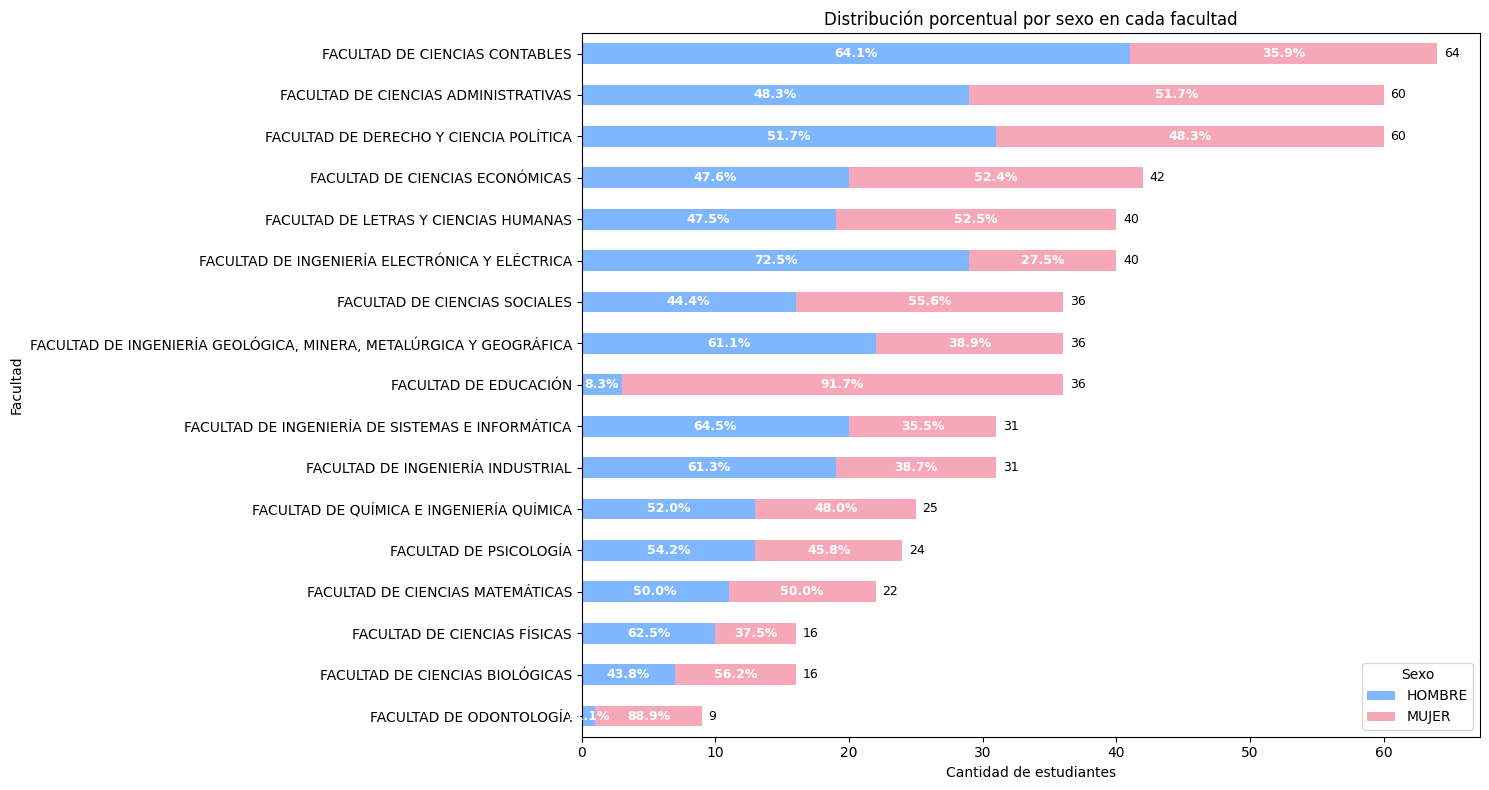

In [33]:
fac_sexo = pd.crosstab(df1['facultad'], df1['sexo'])
fac_sexo['Total'] = fac_sexo.sum(axis=1)
fac_sexo = fac_sexo.sort_values('Total', ascending=True)
totales = fac_sexo['Total']
fac_sexo = fac_sexo.drop(columns='Total')
colores = ['#7eb6ff', '#f7a8b8']
ax = fac_sexo.plot(kind='barh', stacked=True, figsize=(15, 8), color=colores)
plt.title('Distribución porcentual por sexo en cada facultad')
plt.xlabel('Cantidad de estudiantes')
plt.ylabel('Facultad')
for i, (index, row) in enumerate(fac_sexo.iterrows()):
    total = row.sum()
    acumulado = 0
    for j, sexo in enumerate(fac_sexo.columns):
        cantidad = row[sexo]
        porcentaje = (cantidad / total) * 100 if total > 0 else 0
        if cantidad > 0:
            ax.text(
                acumulado + cantidad / 2,
                i,
                f'{porcentaje:.1f}%',
                ha='center',
                va='center',
                color='white',
                fontsize=9,
                fontweight='bold'
            )
            acumulado += cantidad

for i, total in enumerate(totales):
    ax.text(total + 0.5, i, f'{int(total)}', va='center', fontsize=9, color='black')
plt.legend(title='Sexo', loc='lower right')
plt.tight_layout()
plt.show()





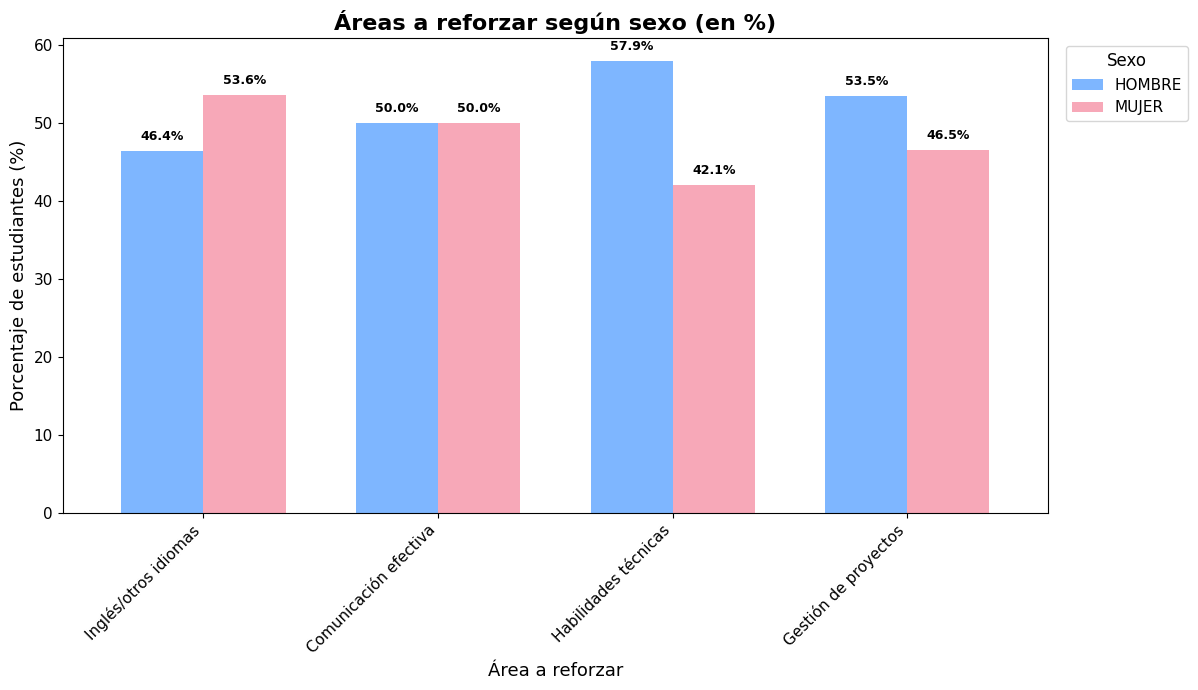

In [34]:
tabla_abs = pd.crosstab(df1['area_reforzar'], df1['sexo'])
tabla_pct = tabla_abs.div(tabla_abs.sum(axis=1), axis=0) * 100
orden = tabla_abs.sum(axis=1).sort_values(ascending=False).index
tabla_pct = tabla_pct.loc[orden]
tabla_abs = tabla_abs.loc[orden]
colores = ['#7eb6ff', '#f7a8b8']
# Gráfico
fig, ax = plt.subplots(figsize=(12, 7))
bars = tabla_pct.plot(kind='bar', ax=ax, color=colores, width=0.7)
plt.title('Áreas a reforzar según sexo (en %)', fontsize=16, fontweight='bold')
plt.xlabel('Área a reforzar', fontsize=13)
plt.ylabel('Porcentaje de estudiantes (%)', fontsize=13)
plt.xticks(rotation=45, ha='right', fontsize=11)
plt.yticks(fontsize=11)
for i, container in enumerate(ax.containers):
    sexo = tabla_pct.columns[i]
    for bar, (area, row) in zip(container, tabla_pct.iterrows()):
        porcentaje = row[sexo]
        if not pd.isna(porcentaje) and porcentaje > 0:
            ax.text(
                bar.get_x() + bar.get_width() / 2,
                bar.get_height() + 1,
                f'{porcentaje:.1f}%',
                ha='center',
                va='bottom',
                fontsize=9,
                fontweight='bold'
            )
plt.legend(
    title='Sexo',
    title_fontsize=12,
    fontsize=11,
    loc='upper right',
    bbox_to_anchor=(1.15, 1)
)
plt.tight_layout()
plt.show()







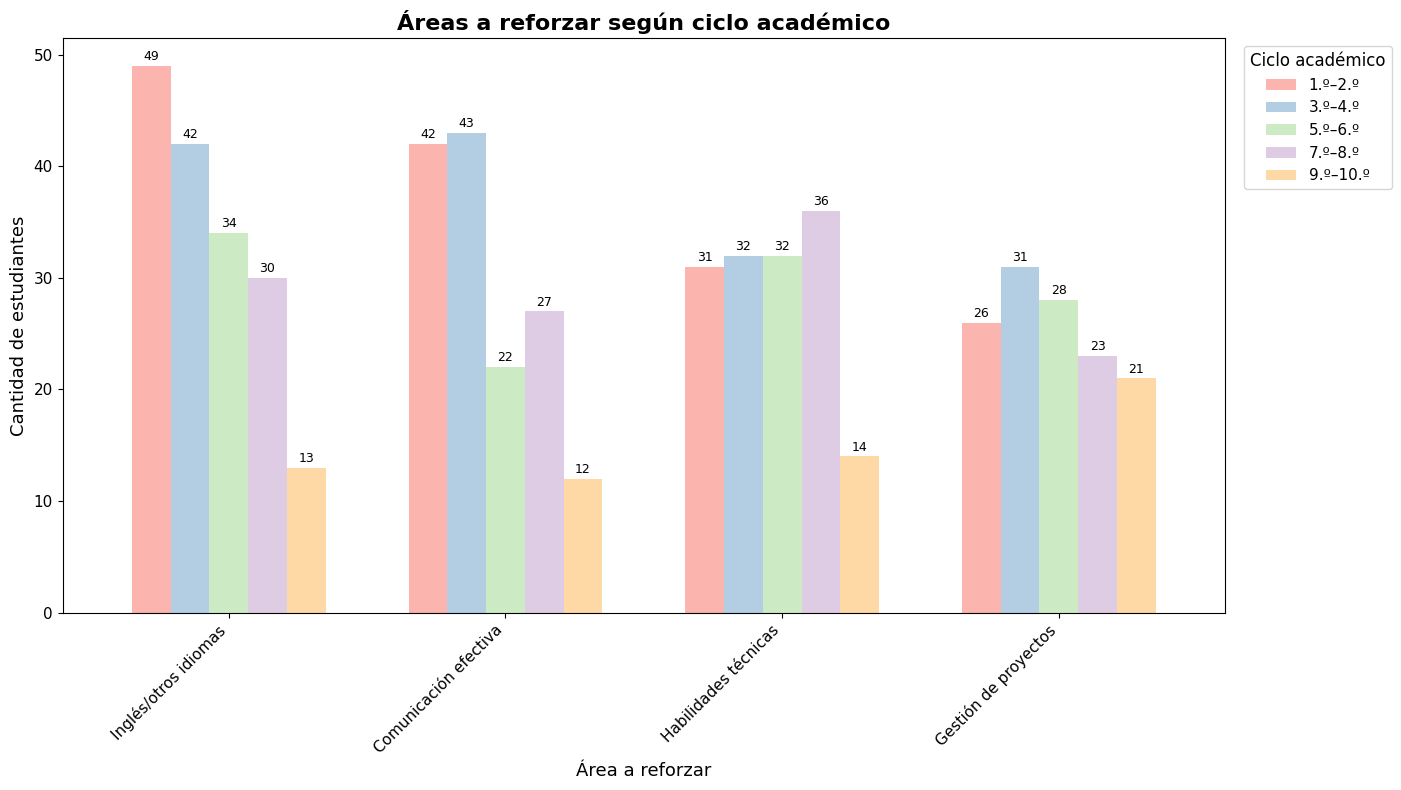

In [35]:
# Creamos la tabla cruzada
tabla = pd.crosstab(df1['area_reforzar'], df1['ciclo'])
# Ordenamos las áreas de mayor a menor total
tabla = tabla.loc[tabla.sum(axis=1).sort_values(ascending=False).index]
# Estilo gráfico
fig, ax = plt.subplots(figsize=(14, 8))
# Paleta pastel
pastel_colors = sns.color_palette("Pastel1", n_colors=tabla.columns.nunique())
# Graficamos
bars = tabla.plot(kind='bar', ax=ax, color=pastel_colors, width=0.7)
# Títulos y ejes
plt.title('Áreas a reforzar según ciclo académico', fontsize=16, fontweight='bold')
plt.xlabel('Área a reforzar', fontsize=13)
plt.ylabel('Cantidad de estudiantes', fontsize=13)
plt.xticks(rotation=45, ha='right', fontsize=11)
plt.yticks(fontsize=11)
# Etiquetas encima de cada barra
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=9, padding=2)
plt.legend(
    title='Ciclo académico',
    title_fontsize=12,
    fontsize=11,
    loc='upper right',
    bbox_to_anchor=(1.15, 1)
)
plt.tight_layout()
plt.show()






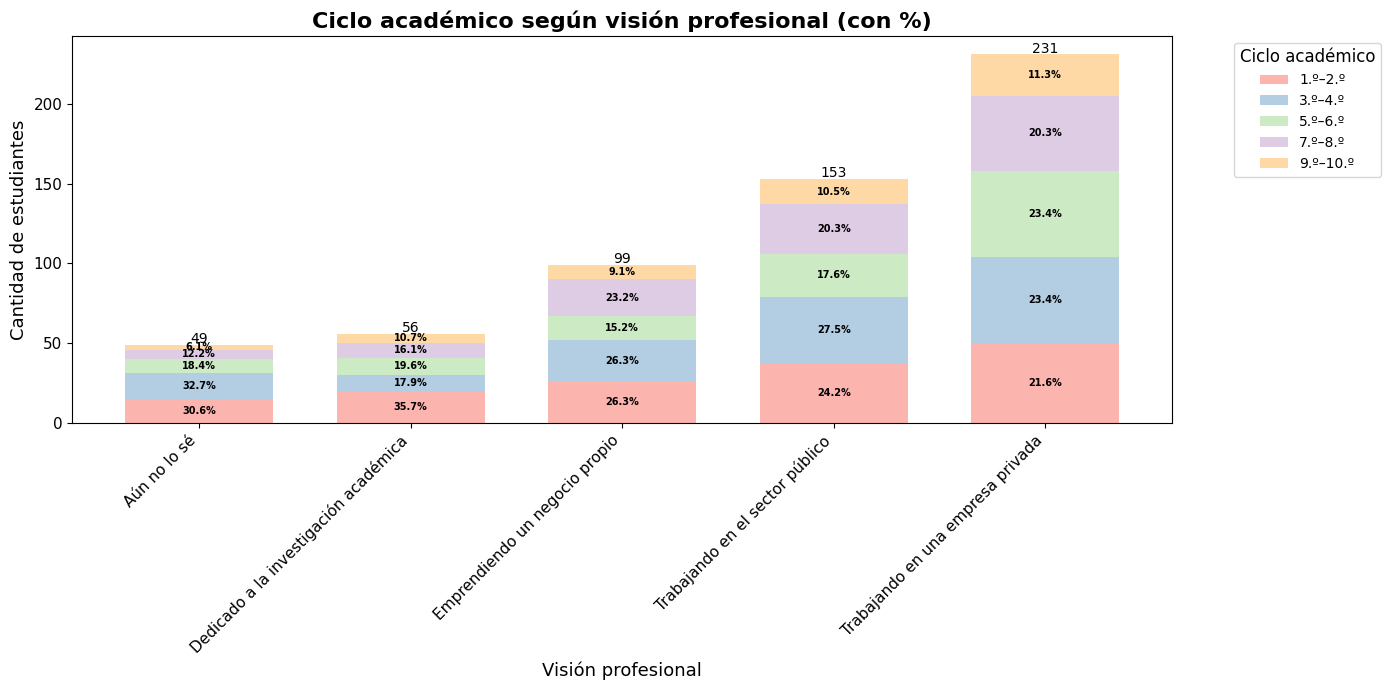

In [36]:
def clasificar_ciclo_pares(c):
    c = str(c).strip().lower()
    if '1.º' in c or '2.º' in c:
        return '1.º–2.º'
    elif '3.º' in c or '4.º' in c:
        return '3.º–4.º'
    elif '5.º' in c or '6.º' in c:
        return '5.º–6.º'
    elif '7.º' in c or '8.º' in c:
        return '7.º–8.º'
    elif '9.º' in c or '10.º' in c:
        return '9.º–10.º'
    return 'Otro'

df1['ciclo_pares'] = df1['ciclo'].apply(clasificar_ciclo_pares)
tabla_abs = pd.crosstab(df1['vision_profesional'], df1['ciclo_pares'])
orden_columnas = ['1.º–2.º', '3.º–4.º', '5.º–6.º', '7.º–8.º', '9.º–10.º']
tabla_abs = tabla_abs[[col for col in orden_columnas if col in tabla_abs.columns]]

tabla_pct = tabla_abs.div(tabla_abs.sum(axis=1), axis=0) * 100

# Gráfico
fig, ax = plt.subplots(figsize=(14, 7))
colores = sns.color_palette("Pastel1", n_colors=tabla_abs.columns.nunique())

bars = tabla_abs.plot(kind='bar', stacked=True, ax=ax, color=colores, width=0.7)
plt.title('Ciclo académico según visión profesional (con %)', fontsize=16, fontweight='bold')
plt.xlabel('Visión profesional', fontsize=13)
plt.ylabel('Cantidad de estudiantes', fontsize=13)
plt.xticks(rotation=45, ha='right', fontsize=11)
plt.yticks(fontsize=11)
for i, (index, fila) in enumerate(tabla_abs.iterrows()):
    acumulado = 0
    for j, ciclo in enumerate(tabla_abs.columns):
        valor = fila[ciclo]
        porcentaje = tabla_pct.loc[index, ciclo]
        if valor > 0:
            ax.text(
                x=i,
                y=acumulado + valor / 2,
                s=f'{porcentaje:.1f}%',
                ha='center',
                va='center',
                fontsize=7,
                color='black',
                fontweight='bold'
            )
            acumulado += valor
for i, total in enumerate(tabla_abs.sum(axis=1)):
    ax.text(i, total + 1, str(total), ha='center', fontsize=10)
plt.legend(
    title='Ciclo académico',
    title_fontsize=12,
    fontsize=10,
    bbox_to_anchor=(1.05, 1),
    loc='upper left'
)

plt.tight_layout()
plt.show()







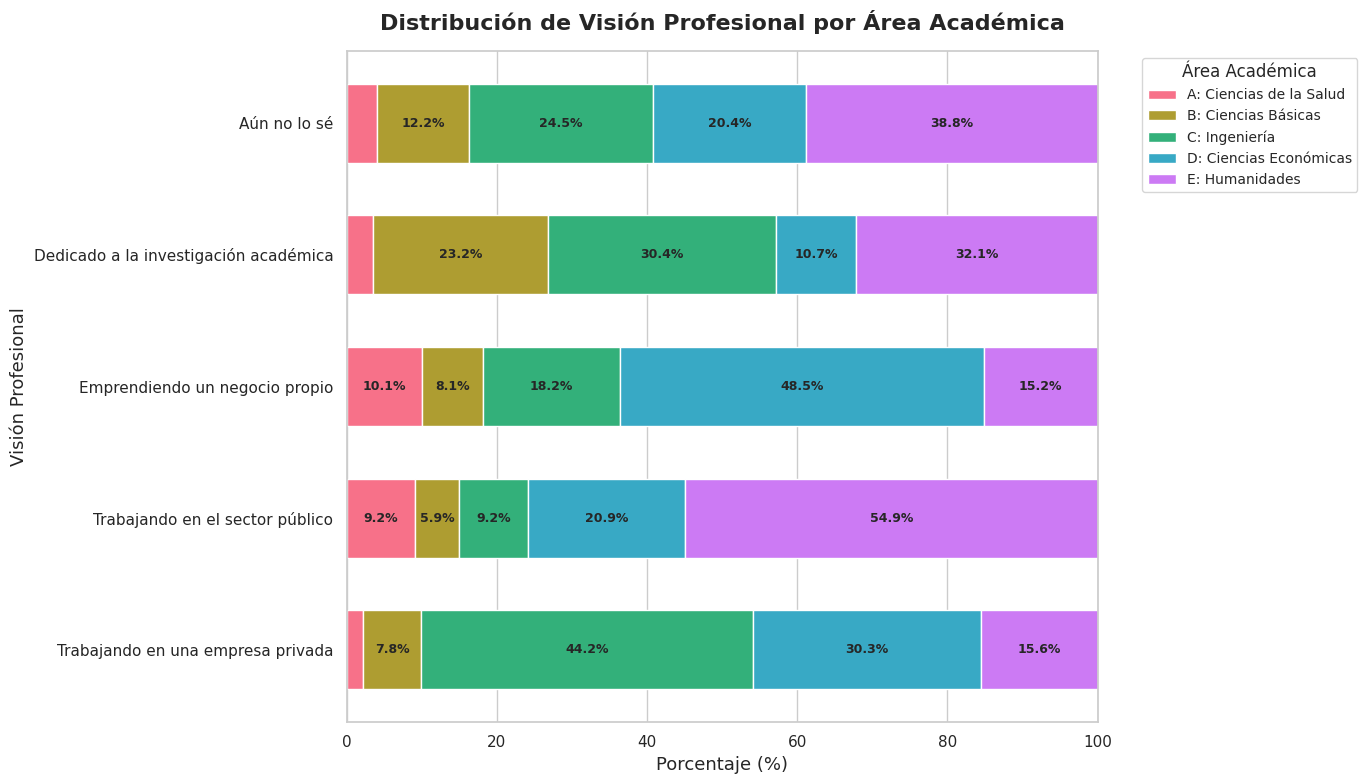

In [37]:
# Asegurar que las columnas clave están normalizadas
df1['facultad'] = df1['facultad'].str.strip().str.upper()
df1['vision_profesional'] = df1['vision_profesional'].str.strip()

# Mapeo actualizado (convertido a mayúsculas para que coincida con la limpieza)
area_mapping = {
    'FACULTAD DE ODONTOLOGÍA': 'A: Ciencias de la Salud',
    'FACULTAD DE PSICOLOGÍA': 'A: Ciencias de la Salud',
    'FACULTAD DE CIENCIAS BIOLÓGICAS': 'B: Ciencias Básicas',
    'FACULTAD DE CIENCIAS FÍSICAS': 'B: Ciencias Básicas',
    'FACULTAD DE CIENCIAS MATEMÁTICAS': 'B: Ciencias Básicas',
    'FACULTAD DE INGENIERÍA DE SISTEMAS E INFORMÁTICA': 'C: Ingeniería',
    'FACULTAD DE INGENIERÍA ELECTRÓNICA Y ELÉCTRICA': 'C: Ingeniería',
    'FACULTAD DE INGENIERÍA GEOLÓGICA, MINERA, METALÚRGICA Y GEOGRÁFICA': 'C: Ingeniería',
    'FACULTAD DE INGENIERÍA INDUSTRIAL': 'C: Ingeniería',
    'FACULTAD DE QUÍMICA E INGENIERÍA QUÍMICA': 'C: Ingeniería',
    'FACULTAD DE CIENCIAS ADMINISTRATIVAS': 'D: Ciencias Económicas',
    'FACULTAD DE CIENCIAS CONTABLES': 'D: Ciencias Económicas',
    'FACULTAD DE CIENCIAS ECONÓMICAS': 'D: Ciencias Económicas',
    'FACULTAD DE EDUCACIÓN': 'E: Humanidades',
    'FACULTAD DE CIENCIAS SOCIALES': 'E: Humanidades',
    'FACULTAD DE DERECHO Y CIENCIA POLÍTICA': 'E: Humanidades',
    'FACULTAD DE LETRAS Y CIENCIAS HUMANAS': 'E: Humanidades'
}

# Filtrar solo facultades que están en el mapeo
df_filtered = df1[df1['facultad'].isin(area_mapping.keys())].copy()
df_filtered['area_academica'] = df_filtered['facultad'].map(area_mapping)

# Crear tabla cruzada normalizada por filas
vision_area = pd.crosstab(
    df_filtered['vision_profesional'],
    df_filtered['area_academica'],
    normalize='index'
) * 100

# Asegurar que todos los valores son numéricos
vision_area = vision_area.apply(pd.to_numeric, errors='coerce')
vision_area.dropna(how='all', inplace=True)

# Ordenar las visiones por frecuencia
vision_order = df_filtered['vision_profesional'].value_counts().index
vision_area = vision_area.reindex(vision_order)

# Estilo y colores
sns.set(style="whitegrid")
colors = sns.color_palette("husl", n_colors=len(vision_area.columns))
fig, ax = plt.subplots(figsize=(14, 8))

# Graficar
bars = vision_area.plot(kind='barh',
                        stacked=True,
                        color=colors,
                        width=0.6,
                        edgecolor='white',
                        linewidth=1,
                        ax=ax)

# Etiquetas
ax.set_title('Distribución de Visión Profesional por Área Académica', fontsize=16, pad=15, fontweight='bold')
ax.set_xlabel('Porcentaje (%)', fontsize=13)
ax.set_ylabel('Visión Profesional', fontsize=13)
ax.tick_params(axis='both', labelsize=11)
ax.set_xlim(0, 100)

# Añadir porcentajes en las barras
for i, (idx, row) in enumerate(vision_area.iterrows()):
    cumulative = 0
    for j, (col, value) in enumerate(row.items()):
        if pd.notnull(value) and value > 5:
            ax.text(cumulative + value / 2, i, f"{value:.1f}%",
                    ha='center', va='center', fontsize=9, fontweight='bold')
        cumulative += value

# Leyenda
ax.legend(title='Área Académica', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)

plt.tight_layout()
plt.show()


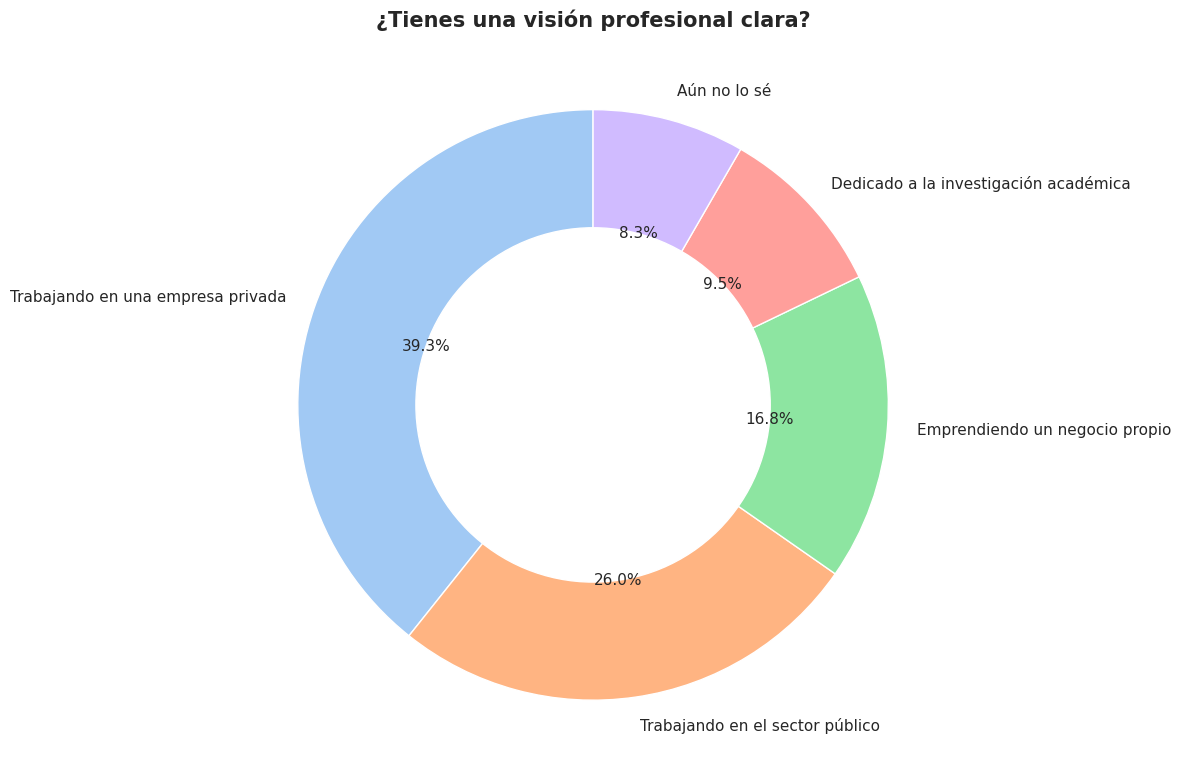

In [38]:
valores = df1['vision_profesional'].value_counts()
etiquetas = valores.index
# Paleta pastel suave
colores = sns.color_palette('pastel')[0:len(etiquetas)]
# Crear gráfico de pastel
fig, ax = plt.subplots(figsize=(15,8))
wedges, texts, autotexts = ax.pie(
    valores,
    labels=etiquetas,
    autopct='%1.1f%%',
    startangle=90,
    colors=colores,
    wedgeprops={'linewidth': 1, 'edgecolor': 'white'},
    textprops={'fontsize': 11}
)
# Añadir círculo blanco al centro (donut)
centro = plt.Circle((0, 0), 0.60, fc='white')
fig.gca().add_artist(centro)
plt.title('¿Tienes una visión profesional clara?', fontsize=15, fontweight='bold')
plt.tight_layout()
plt.show()




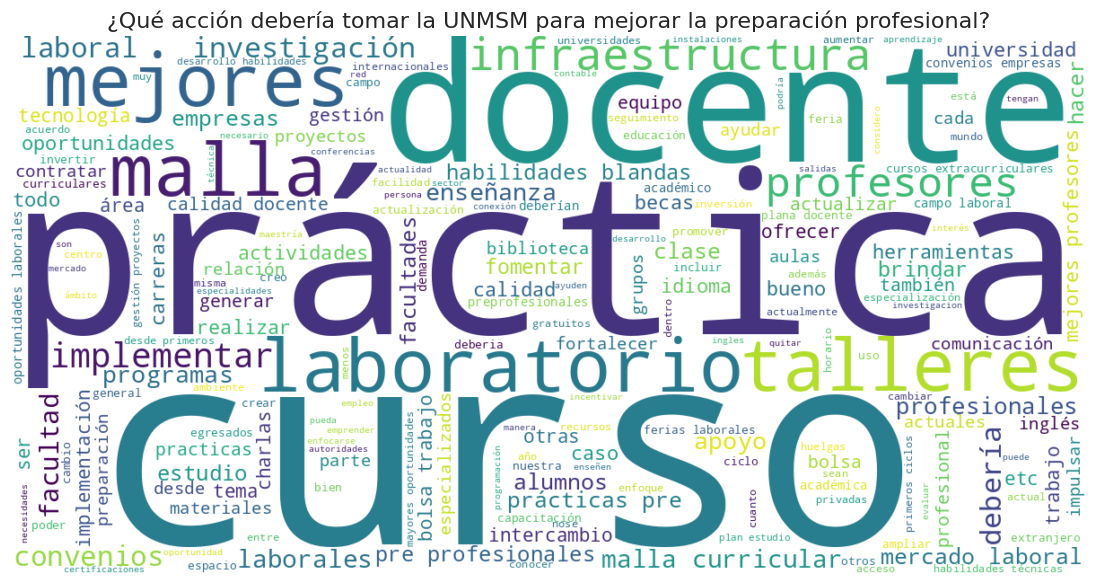

In [39]:
#WORLD MAP
# Lista ampliada de stopwords comunes en español
stopwords_personalizadas = {
    'y', 'o', 'para', 'con', 'de', 'la', 'el', 'los', 'las', 'un', 'una', 'unos', 'unas',
    'que', 'en', 'es', 'al', 'por', 'se', 'del', 'a', 'como', 'su', 'lo', 'sí', 'no', 'ya',
    'yo', 'tú', 'él', 'ella', 'nosotros', 'ustedes', 'ellos', 'ellas', 'me', 'te', 'nos',
    'mi', 'mis', 'tu', 'tus', 'sus', 'ese', 'esa', 'eso', 'estos', 'estas', 'ese', 'esa', 'eso','tener','dar','debería'
    'le', 'les', 'cuál', 'quién', 'donde', 'cuando', 'porque', 'aunque', 'pero', 'ni', 'pues', 'entonces','mas','más','mejorar','mayor','mejor','mejora','estudiante','carrera','maestria','estudiantes','sobre'
}

# Unir texto, convertir a minúsculas y limpiar caracteres especiales
texto = " ".join(df1['accion_unmsm'].dropna().astype(str)).lower()
texto = re.sub(r'[^a-záéíóúñü\s]', '', texto)

# Eliminar palabras muy cortas y stopwords
palabras_filtradas = [
    palabra for palabra in texto.split()
    if palabra not in stopwords_personalizadas and len(palabra) > 2
]

# Texto limpio
texto_filtrado = " ".join(palabras_filtradas)

# Crear la nube de palabras
wordcloud = WordCloud(
    width=1200, height=600,
    background_color='white',
    colormap='viridis'
).generate(texto_filtrado)

# Mostrar la nube
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('¿Qué acción debería tomar la UNMSM para mejorar la preparación profesional?', fontsize=16)
plt.tight_layout()
plt.show()




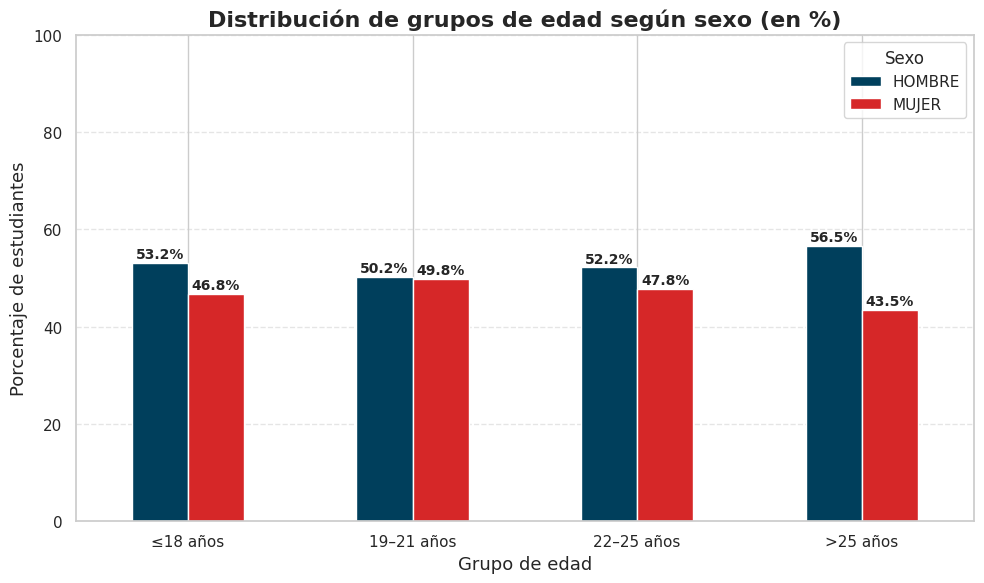

In [40]:

def agrupar_edad(e):
    try:
        e = float(e)
        if e <= 18:
            return '≤18 años'
        elif e <= 21:
            return '19–21 años'
        elif e <= 25:
            return '22–25 años'
        else:
            return '>25 años'
    except:
        return 'Desconocido'
df1['grupo_edad'] = df1['edad'].apply(agrupar_edad)
df_filtrado = df1[df1['grupo_edad'] != 'Desconocido']
orden_edades = ['≤18 años', '19–21 años', '22–25 años', '>25 años']
tabla = pd.crosstab(df_filtrado['grupo_edad'], df_filtrado['sexo'])
tabla = tabla.reindex(index=orden_edades)

tabla_pct = tabla.div(tabla.sum(axis=1), axis=0) * 100

# gráfico de barras agrupadas
fig, ax = plt.subplots(figsize=(10, 6))
tabla_pct.plot(kind='bar', ax=ax, color=['#003f5c', '#d62728'])
for bars in ax.containers:
    for bar in bars:
        height = bar.get_height()
        if height > 0:
            ax.text(
                bar.get_x() + bar.get_width() / 2,
                height + 1,
                f"{height:.1f}%",
                ha='center',
                fontsize=10,
                fontweight='bold'
            )
ax.set_title('Distribución de grupos de edad según sexo (en %)', fontsize=16, fontweight='bold')
ax.set_xlabel('Grupo de edad', fontsize=13)
ax.set_ylabel('Porcentaje de estudiantes', fontsize=13)
ax.set_xticklabels(orden_edades, rotation=0)
ax.legend(title='Sexo')
ax.set_ylim(0, 100)
ax.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()







In [41]:
likert_cols_7 = [
    ('prep_entrevista', 'Preparación para entrevistas'),
    ('confianza_tecnica', 'Confianza técnica'),
    ('habilidades_blandas', 'Habilidades blandas'),
    ('prep_oportunidades', 'Preparación para oportunidades'),
    ('apoyo_universidad', 'Apoyo de la universidad'),
    ('red_apoyo', 'Red de apoyo'),
    ('ingles_necesario', 'Inglés necesario')
]
likert_cols_14 = [
    ('influencia_familia', 'Influencia familiar'),
    ('motivacion_emprender', 'Motivación para emprender'),
    ('percepcion_demanda', 'Percepción de demanda laboral')
]


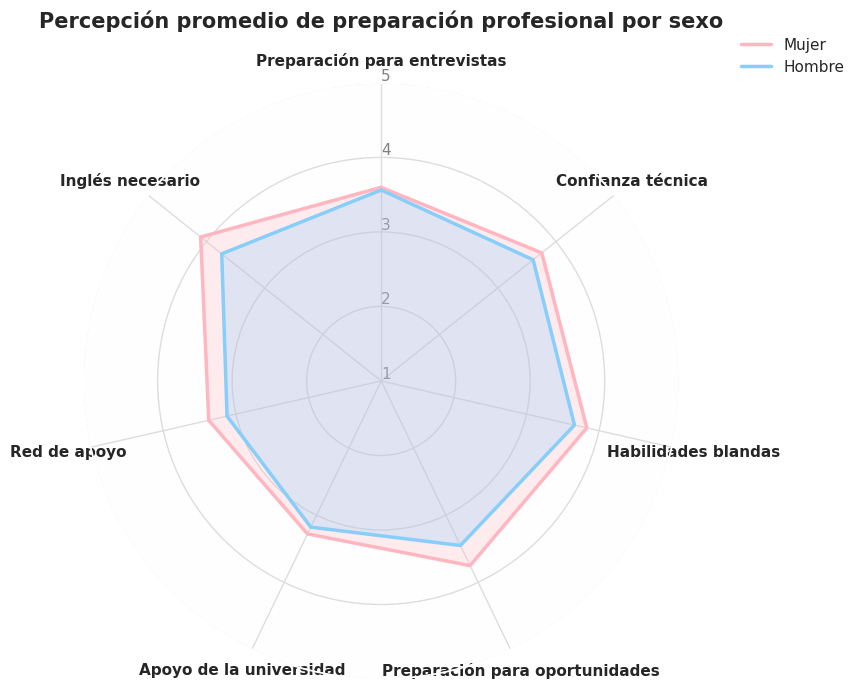

In [42]:
# Paso 1: Columnas tipo Likert
cols = [col for col, _ in likert_cols_7]
labels = [titulo for _, titulo in likert_cols_7]

# Paso 2: Agrupación por sexo
mean_likert = df1.groupby('sexo')[cols].mean()

# Asegurar orden MUJER y HOMBRE
grupos = ['MUJER', 'HOMBRE']
mean_likert = mean_likert.loc[grupos]

# Valores
values_mujer = mean_likert.loc['MUJER'].tolist()
values_hombre = mean_likert.loc['HOMBRE'].tolist()

# Cerrar el radar
values_mujer.append(values_mujer[0])
values_hombre.append(values_hombre[0])
labels.append(labels[0])

# Ángulos
angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=True)

# --- Estilo bonito ---
mpl.rcParams.update({
    'font.size': 11,
    'axes.facecolor': '#f9f9f9',
    'axes.edgecolor': 'white',
    'axes.grid': True,
    'grid.color': '#dddddd'
})

# Crear gráfico
plt.figure(figsize=(14, 7))
ax = plt.subplot(111, polar=True)

# Fondo y dirección
ax.set_facecolor('#fefefe')
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)

# Etiquetas angulares
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels[:-1], fontsize=11, weight='bold')

# Eje radial
ax.set_rlabel_position(0)
ax.set_yticks([1, 2, 3, 4, 5])
ax.set_yticklabels(['1', '2', '3', '4', '5'], color='gray')
ax.set_ylim(1, 5)

# Trazado de líneas
ax.plot(angles, values_mujer, linewidth=2.5, linestyle='-', label='Mujer', color='#FFB6C1')   # Rosado suave
ax.fill(angles, values_mujer, alpha=0.25, color='#FFB6C1')

ax.plot(angles, values_hombre, linewidth=2.5, linestyle='-', label='Hombre', color='#87CEFA')  # Celeste pastel
ax.fill(angles, values_hombre, alpha=0.25, color='#87CEFA')

# Título y leyenda
plt.title('Percepción promedio de preparación profesional por sexo', size=15, weight='bold', y=1.08)
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1), frameon=False)

plt.tight_layout()
plt.show()

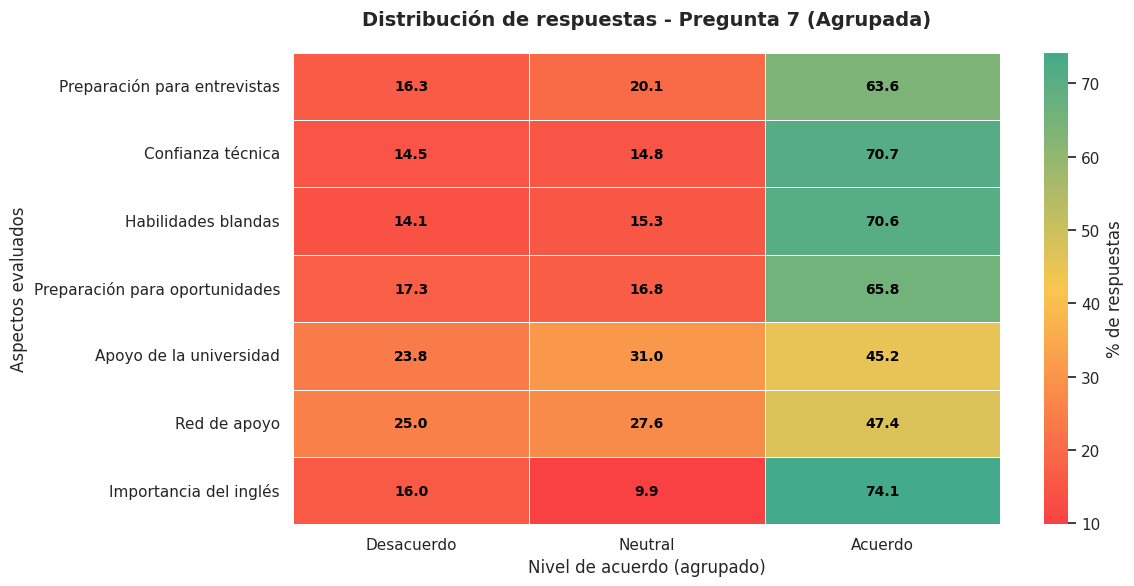

In [43]:
# ----------------------------
# Pregunta 7 - columnas Likert
# ----------------------------
cols_preg7 = [
    'prep_entrevista', 'confianza_tecnica', 'habilidades_blandas',
    'prep_oportunidades', 'apoyo_universidad', 'red_apoyo', 'ingles_necesario'
]

# Etiquetas legibles
col_labels = {
    'prep_entrevista': 'Preparación para entrevistas',
    'confianza_tecnica': 'Confianza técnica',
    'habilidades_blandas': 'Habilidades blandas',
    'prep_oportunidades': 'Preparación para oportunidades',
    'apoyo_universidad': 'Apoyo de la universidad',
    'red_apoyo': 'Red de apoyo',
    'ingles_necesario': 'Importancia del inglés'
}

# ----------------------------
# Construcción de tabla de porcentajes agrupados
# ----------------------------
tabla_likert = pd.DataFrame()

for col in cols_preg7:
    respuestas = df1[col].astype(str).replace({
        '1': 'Desacuerdo',
        '2': 'Desacuerdo',
        '3': 'Neutral',
        '4': 'Acuerdo',
        '5': 'Acuerdo',
        'Totalmente en desacuerdo': 'Desacuerdo',
        'En desacuerdo': 'Desacuerdo',
        'Neutral': 'Neutral',
        'De acuerdo': 'Acuerdo',
        'Totalmente de acuerdo': 'Acuerdo'
    })

    porcentajes = respuestas.value_counts(normalize=True).reindex(
        ['Desacuerdo', 'Neutral', 'Acuerdo'], fill_value=0) * 100
    tabla_likert[col_labels[col]] = porcentajes

tabla_likert = tabla_likert.T.astype(float)

# ----------------------------
# Colormap rojo-amarillo-verde
# ----------------------------
colors = ["#f94144", "#f9c74f", "#43aa8b"]
cmap = LinearSegmentedColormap.from_list("custom_likert", colors, N=256)

# ----------------------------
# Visualización heatmap
# ----------------------------
plt.figure(figsize=(12, 6))
sns.heatmap(
    tabla_likert,
    cmap=cmap,
    annot=True,
    fmt=".1f",
    linewidths=0.5,
    cbar_kws={'label': '% de respuestas'},
    square=False,
    annot_kws={"size": 10, "weight": "bold", "color": "black"}
)

plt.title('Distribución de respuestas - Pregunta 7 (Agrupada)', fontsize=14, weight='bold', pad=20)
plt.xlabel('Nivel de acuerdo (agrupado)', fontsize=12)
plt.ylabel('Aspectos evaluados', fontsize=12)
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()




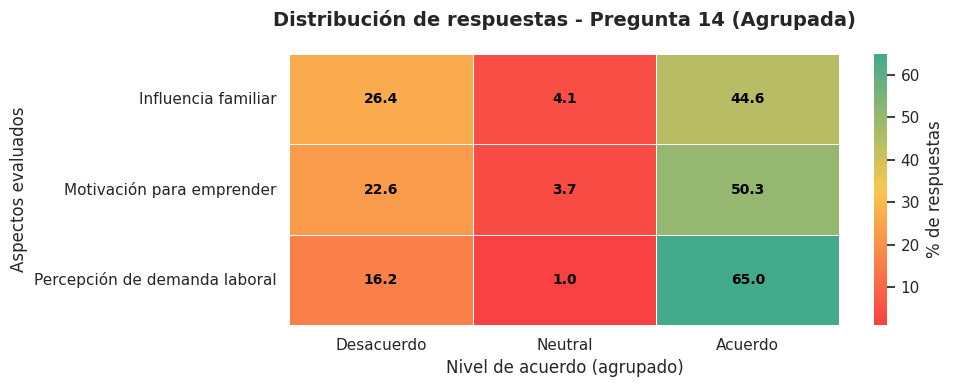

In [44]:
# ----------------------------
# Pregunta 14 - columnas tipo Likert
# ----------------------------
cols_preg14 = ['influencia_familia', 'motivacion_emprender', 'percepcion_demanda']

# Etiquetas descriptivas para mostrar
col_labels_14 = {
    'influencia_familia': 'Influencia familiar',
    'motivacion_emprender': 'Motivación para emprender',
    'percepcion_demanda': 'Percepción de demanda laboral'
}

# ----------------------------
# Construcción de tabla de % agrupados
# ----------------------------
tabla_likert_14 = pd.DataFrame()

for col in cols_preg14:
    respuestas = df1[col].astype(str).replace({
        '1': 'Desacuerdo',
        '2': 'Desacuerdo',
        '3': 'Neutral',
        '4': 'Acuerdo',
        '5': 'Acuerdo',
        'Totalmente en desacuerdo': 'Desacuerdo',
        'En desacuerdo': 'Desacuerdo',
        'Neutral': 'Neutral',
        'De acuerdo': 'Acuerdo',
        'Totalmente de acuerdo': 'Acuerdo'
    })

    porcentajes = respuestas.value_counts(normalize=True).reindex(
        ['Desacuerdo', 'Neutral', 'Acuerdo'], fill_value=0) * 100
    tabla_likert_14[col_labels_14[col]] = porcentajes

tabla_likert_14 = tabla_likert_14.T.astype(float)

# ----------------------------
# Colormap: rojo → amarillo → verde
# ----------------------------
colors = ["#f94144", "#f9c74f", "#43aa8b"]
cmap = LinearSegmentedColormap.from_list("custom_likert", colors, N=256)

# ----------------------------
# Visualización del heatmap tipo tutubox
# ----------------------------
plt.figure(figsize=(10, 4))
sns.heatmap(
    tabla_likert_14,
    cmap=cmap,
    annot=True,
    fmt=".1f",
    linewidths=0.5,
    cbar_kws={'label': '% de respuestas'},
    square=False,
    annot_kws={"size": 10, "weight": "bold", "color": "black"}
)

plt.title('Distribución de respuestas - Pregunta 14 (Agrupada)', fontsize=14, weight='bold', pad=20)
plt.xlabel('Nivel de acuerdo (agrupado)', fontsize=12)
plt.ylabel('Aspectos evaluados', fontsize=12)
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


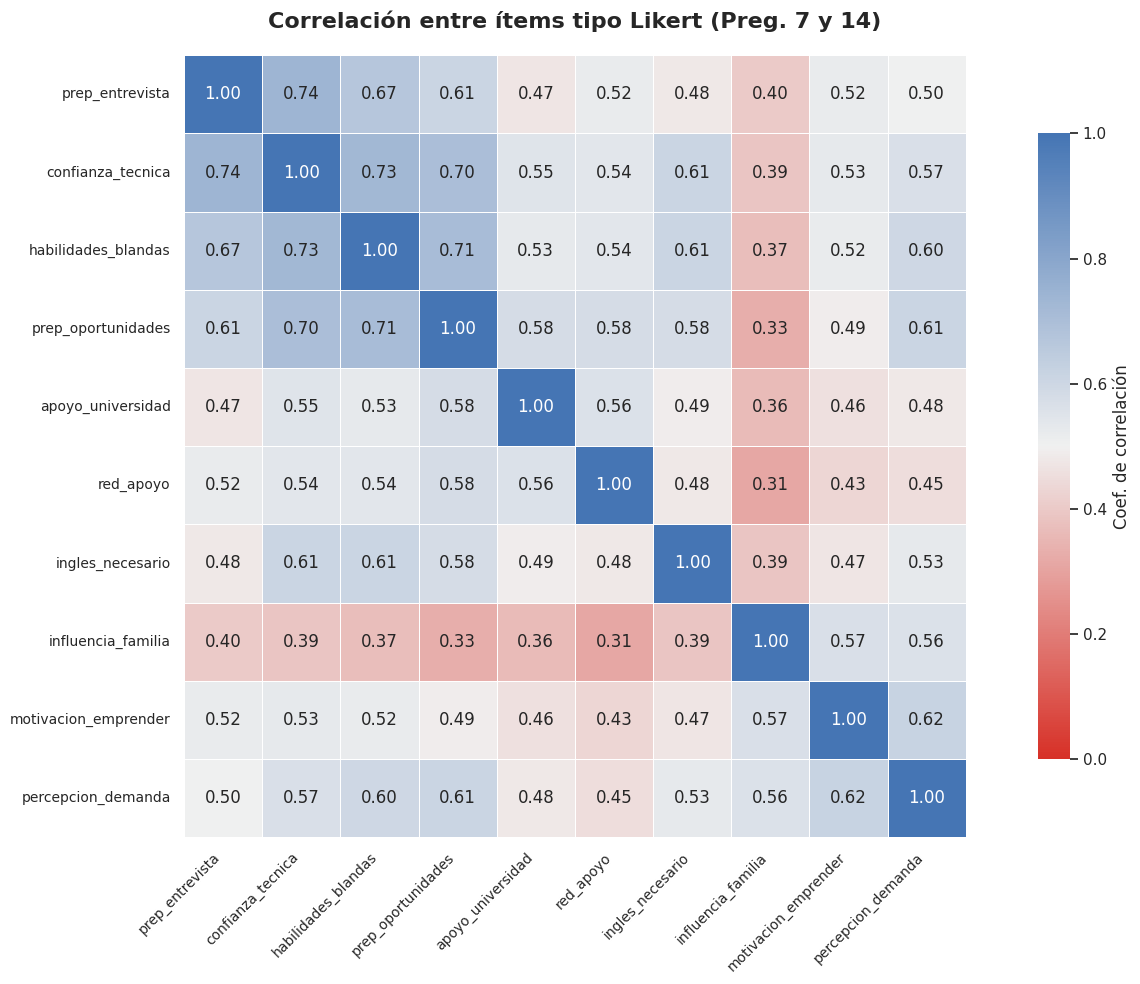

In [45]:
# Columnas tipo Likert
cols_preg7 = [
    'prep_entrevista', 'confianza_tecnica', 'habilidades_blandas',
    'prep_oportunidades', 'apoyo_universidad', 'red_apoyo', 'ingles_necesario'
]

cols_preg14 = ['influencia_familia', 'motivacion_emprender', 'percepcion_demanda']
likert_cols_all = cols_preg7 + cols_preg14
# Correlación
corr = df1[likert_cols_all].corr().round(2)
colors = ["#d73027", "#f0f0f0", "#4575b4"]
cmap = LinearSegmentedColormap.from_list("custom_likert", colors, N=256)
norm = TwoSlopeNorm(vmin=0, vcenter=0.5, vmax=1)
plt.figure(figsize=(15, 10))
sns.set(style="white")

sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap=cmap,
    norm=norm,
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.8, "label": "Coef. de correlación"}
)
plt.title('Correlación entre ítems tipo Likert (Preg. 7 y 14)', fontsize=16, weight='bold', pad=20)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.tight_layout()
plt.show()





**ANALISIS INFERENCIAL**

=== PRUEBA T DE INDEPENDENCIA ===
Estadístico t: 0.3965
Valor p: 0.6919
➡ No se rechaza H₀: no hay diferencia significativa.


/tmp/ipython-input-46-543791435.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df1, x='sexo', y='prep_entrevista', palette={'MUJER': 'pink', 'HOMBRE': 'skyblue'})


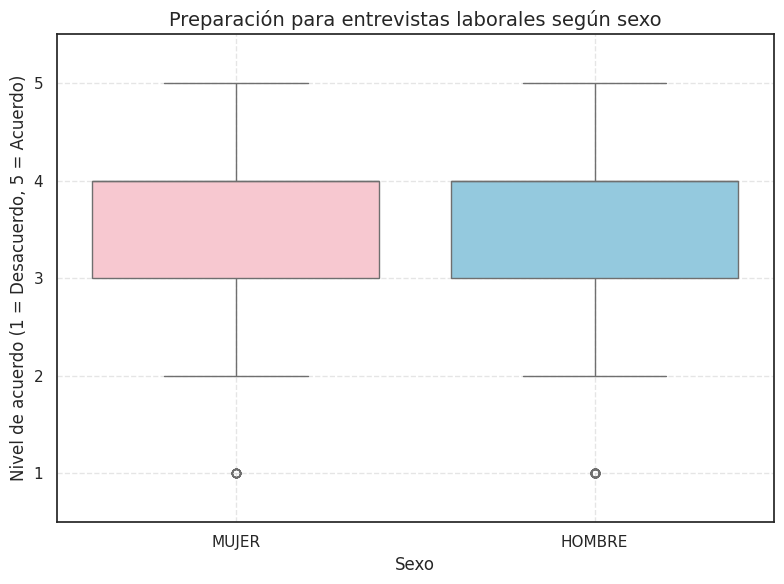

In [46]:
#PRUEBA T
# --- Hipótesis ---
# H₀: No hay diferencia significativa entre hombres y mujeres en la preparación para entrevistas.
# H₁: Sí hay una diferencia significativa entre ambos grupos.

# --- Filtramos los datos ---
grupo_mujer = df1[df1['sexo'] == 'MUJER']['prep_entrevista']
grupo_hombre = df1[df1['sexo'] == 'HOMBRE']['prep_entrevista']

# --- Prueba T de Student ---
t_stat, p_val = ttest_ind(grupo_mujer, grupo_hombre)

print("=== PRUEBA T DE INDEPENDENCIA ===")
print(f"Estadístico t: {t_stat:.4f}")
print(f"Valor p: {p_val:.4f}")
if p_val < 0.05:
    print("➡ Se rechaza H₀: hay diferencia significativa.")
else:
    print("➡ No se rechaza H₀: no hay diferencia significativa.")

# --- Gráfico Boxplot con formato bonito ---
plt.figure(figsize=(8, 6))
sns.boxplot(data=df1, x='sexo', y='prep_entrevista', palette={'MUJER': 'pink', 'HOMBRE': 'skyblue'})
plt.title('Preparación para entrevistas laborales según sexo', fontsize=14)
plt.ylabel('Nivel de acuerdo (1 = Desacuerdo, 5 = Acuerdo)')
plt.xlabel('Sexo')
plt.ylim(0.5, 5.5)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()
